In [3]:
import os
import re
import sys
import datetime as dt

import numpy as np
import pandas as pd

from scipy import stats
from scipy.cluster.vq import kmeans,vq
from pylab import plot,show


import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import DBSCAN, SpectralClustering, MeanShift
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split, learning_curve, cross_val_score
from sklearn.preprocessing import StandardScaler

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.cm as cm
from matplotlib.colors import Normalize
from numpy.random import rand
from bokeh.plotting import figure, show
from bokeh.embed import components
from bokeh.models import CategoricalColorMapper, HoverTool
from bokeh.io import output_notebook
import seaborn as sns
sns.set_style("whitegrid")
output_notebook()

Loading BokehJS ...

In [36]:
project_dir = str(os.path.dirname((os.path.abspath(''))))
sys.path.append(project_dir)
print(project_dir)
figures_folder = project_dir + '/Images/'
base_path = project_dir + '/data/'
print(base_path)

/Users/samypalaniappan/Desktop/Metis_Working_Directory/Projects/Project-4-Stock Superclusters/notebooks
/Users/samypalaniappan/Desktop/Metis_Working_Directory/Projects/Project-4-Stock Superclusters/notebooks/data/


In [3]:
tcker = ['MMM','ABT','ABBV','ACN','ATVI','AYI','ADBE','AMD','AAP','AES','AET',
		'AMG','AFL','A','APD','AKAM','ALK','ALB','ARE','ALXN','ALGN','ALLE',
		'AGN','ADS','LNT','ALL','GOOGL','GOOG','MO','AMZN','AEE','AAL','AEP',
		'AXP','AIG','AMT','AWK','AMP','ABC','AME','AMGN','APH','ADI','ANDV',
		'ANSS','ANTM','AON','AOS','APA','AIV','AAPL','AMAT','APTV','ADM','ARNC',
		'AJG','AIZ','T','ADSK','ADP','AZO','AVB','AVY', 'BLL','BAC','BK',
		'BAX','BDX','BBY','BIIB','BLK','HRB','BA','BWA','BXP','BSX',
		'BHF','BMY','AVGO','CHRW','CA','COG','CDNS','CPB','COF','CAH','CBOE',
		'KMX','CCL','CAT','CNC','CNP','CTL','CERN','CF','SCHW',
		'CHTR','CHK','CVX','CMG','CB','CHD','CI','XEC','CINF','CTAS','CSCO','C','CFG',
		'CTXS','CLX','CME','CMS','KO','CTSH','CL','CMCSA','CMA','CAG','CXO','COP',
		'ED','STZ','COO','GLW','COST','COTY','CCI','CSRA','CSX','CMI','CVS','DHI',
		'DHR','DRI','DVA','DE','DAL','XRAY','DVN','DLR','DFS','DISCA','DISCK','DISH',
		'DG','DLTR','D','DOV','DTE','DRE','DUK','DXC','ETFC','EMN','ETN',
		'EBAY','ECL','EIX','EW','EA','EMR','ETR','EVHC','EOG','EQT','EFX','EQIX','EQR',
		'ESS','EL','ES','RE','EXC','EXPE','EXPD','EXR','XOM','FFIV','FB','FAST',
		'FRT','FDX','FIS','FITB','FE','FISV','FLIR','FLS','FLR','FMC','FL','F','FTV',
		'FBHS','BEN','FCX','GPS','GRMN','IT','GD','GE','GIS','GM','GPC','GILD',
		'GPN','GS','GT','GWW','HAL','HBI','HOG','HIG','HAS','HCA','HP','HSIC',
		'HSY','HES','HPE','HLT','HOLX','HD','HON','HRL','HST','HPQ','HUM','HBAN','HII',
		'IDXX','INFO','ITW','ILMN','IR','INTC','ICE','IBM','INCY','IP','IPG','IFF','INTU',
		'ISRG','IVZ','IQV','IRM','JEC','JBHT','SJM','JNJ','JCI','JPM','JNPR','KSU','K','KEY',
		'KMB','KIM','KMI','KLAC','KSS','KHC','KR','LB','LH','LRCX','LEG','LEN',
		'LLY','LNC','LKQ','LMT','L','LOW','LYB','MTB','MAC','M','MRO','MPC','MAR','MMC','MLM',
		'MAS','MA','MAT','MKC','MCD','MCK','MDT','MRK','MET','MTD','MGM','MCHP','MU',
		'MSFT','MAA','MHK','TAP','MDLZ','MNST','MCO','MS','MOS','MSI','MYL','NDAQ',
		'NOV','NAVI','NTAP','NFLX','NWL','NFX','NEM','NWSA','NWS','NEE','NLSN','NKE','NI',
		'NBL','JWN','NSC','NTRS','NOC','NCLH','NRG','NUE','NVDA','ORLY','OXY','OMC','OKE',
		'ORCL','PCAR','PKG','PH','PDCO','PAYX','PYPL','PNR','PBCT','PEP','PKI','PRGO','PFE',
		'PCG','PM','PSX','PNW','PXD','PNC','RL','PPG','PPL','PX','PFG','PG','PGR',
		'PLD','PRU','PEG','PSA','PHM','PVH','QRVO','PWR','QCOM','DGX','RRC','RJF','RTN','O',
		'REG','REGN','RF','RSG','RMD','RHI','ROK','COL','ROP','ROST','RCL','CRM','SBAC',
		'SCG','SLB','SNI','STX','SEE','SRE','SHW','SIG','SPG','SWKS','SLG','SNA','SO','LUV',
		'SPGI','SWK','SBUX','STT','SRCL','SYK','SYF','SNPS','SYY','TROW','TPR',
		'TGT','TEL','FTI','TXN','TXT','TMO','TIF','TWX','TJX','TSCO','TDG','TRV',
		'TRIP','FOXA','FOX','TSN','UDR','ULTA','USB','UAA','UA','UNP','UAL','UNH','UPS','URI',
		'UTX','UHS','UNM','VFC','VLO','VAR','VTR','VRSN','VRSK','VZ','VRTX','V','VNO',
		'VMC','WMT','WBA','DIS','WM','WAT','WEC','WFC','WDC','WU','WRK','WY','WHR','WMB',
		'WLTW','WYNN','XEL','XRX','XLNX','XL','XYL','YUM','ZBH','ZION','ZTS']
len(tcker)

478

In [4]:
def file_import(number_articles): 
    df_list=[]
    for i in tcker[0:number_articles]:
        try:
            df = pd.read_csv(base_path+i+'_data.csv', index_col=0, usecols=['Date', 'Adj Close'])
            df = df.rename(columns={'Adj Close':i})
            df_list.append(df)
        except Exception as e:
            print(e)
        df_stocks = pd.concat(df_list, axis=1, sort=False)
    print(df_stocks.shape)
    return df_stocks

In [5]:
def date_filter(df_list, start, end):
    for i in df_list:
        i.dropna()
        mask = (pd.to_datetime(i.Date) > start) & (pd.to_datetime(i.Date) <= end)
        i = i[mask]
        #i = i.sort_values(['Date'])
    return df_list

In [6]:
number_articles = 478
stocks = file_import(number_articles)


[Errno 2] File b'/Users/samypalaniappan/Desktop/03-Beat-the-Market/notebooks/data/5yr/XL_data.csv' does not exist: b'/Users/samypalaniappan/Desktop/03-Beat-the-Market/notebooks/data/5yr/XL_data.csv'
(1259, 477)


In [79]:
print(stocks.columns)
print(stocks.iloc[0,4])

Index(['MMM', 'ABT', 'ABBV', 'ACN', 'ATVI', 'AYI', 'ADBE', 'AMD', 'AAP', 'AES',
       ...
       'WLTW', 'WYNN', 'XEL', 'XRX', 'XLNX', 'XYL', 'YUM', 'ZBH', 'ZION',
       'ZTS'],
      dtype='object', length=477)
22.54758262634277


In [80]:
stocks.tail()

,MMM,ABT,ABBV,ACN,ATVI,AYI,ADBE,AMD,AAP,AES,...,WLTW,WYNN,XEL,XRX,XLNX,XYL,YUM,ZBH,ZION,ZTS
2020-02-11,160.992111,89.169998,96.000000,212.139999,61.189999,118.860001,369.279999,53.799999,132.110001,20.790001,...,212.979996,131.990005,68.959999,37.509998,90.290001,87.239998,103.585754,159.289993,45.939999,144.029999
2020-02-12,162.330002,88.790001,97.790001,211.990005,62.799999,119.209999,374.290009,53.889999,134.320007,20.959999,...,212.720001,136.820007,69.029999,38.189999,91.169998,89.129997,104.869995,158.699997,46.110001,142.979996
2020-02-13,159.759995,88.680000,95.349998,212.399994,62.590000,118.279999,374.839996,54.529999,134.669998,20.830000,...,212.800003,133.619995,69.820000,38.209999,90.410004,87.050003,105.029999,158.729996,46.439999,144.940002
2020-02-14,161.009995,89.660004,94.050003,212.369995,63.520000,116.900002,379.670013,55.310001,133.589996,20.930000,...,213.669998,132.139999,70.260002,37.820000,90.169998,88.139999,105.279999,160.399994,46.259998,144.169998
2020-02-18,158.800003,88.879997,93.599998,213.759995,63.740002,116.660004,378.850006,56.889999,141.809998,21.040001,...,212.690002,133.460007,71.160004,37.220001,89.239998,88.089996,104.040001,159.229996,45.090000,143.639999


       Returns  Volatility
MMM   0.036849    0.197994
ABT   0.172151    0.206399
ABBV  0.172717    0.281523
ACN   0.214426    0.191929
ATVI  0.261095    0.325344


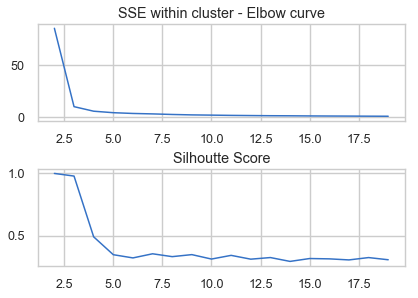

In [86]:
#Calculate average annual percentage return and volatilities over a theoretical one year period
returns = stocks.pct_change().mean() * 252
returns = pd.DataFrame(returns)
returns.columns = ['Returns']
returns['Volatility'] = stocks.pct_change().std()*np.sqrt(252)
print(returns.head())
#format the data as a numpy array to feed into the K-Means algorithm
data = np.asarray([np.asarray(returns['Returns']),np.asarray(returns['Volatility'])]).T
X_train, X_test = train_test_split(data, test_size=0.3,  random_state=4444)


SSE_within_cluster = []
silhoutte_score = []
for k in range(2, 20):
    k_means = KMeans(n_clusters=k)
    k_means.fit(data)
    SSE_within_cluster.append(k_means.inertia_)
    silhoutte_score.append(metrics.silhouette_score(data, k_means.labels_, random_state=10))

#print(silhoutte_score, SSE_within_cluster)
fig = plt.figure(figsize=(6, 4))
ax1 = plt.subplot(211)
plt.plot(range(2, 20), SSE_within_cluster)
plt.grid(True)
plt.title('SSE within cluster - Elbow curve')
ax2 = plt.subplot(212)
plt.plot(range(2, 20), silhoutte_score)
plt.grid(True)
plt.title('Silhoutte Score')
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.5, wspace=0.35)

In [87]:
print (k_means.labels_)

[10  4  6 11 18  9 18  5  9  6 16 15  4  4  4 13  0 13  4  3  8 11  9 15
  4  4 11 11 10  8  4  9  4  4 10 11 11 13  0  4 13  4  6  4 11  6  4 13
  3 16  6 18 13 10  9  4 11 16 18  4 13 16 11  4  6 10 11  4 18  9  4  9
  6 15 10  6  1  0 18 10 15  3 18  0 13  9  4 13  0 13  6 16  3  0  9 13
 18  7 10 13 16  4 13  3  4 11  4 13 13  6 16 11  4 16  0 10  4 13  0  9
  9 16  4  4  0  4  3  4  4  6  0 15  6 18 11  0  6 13  0  3 11  0  9  9
 15  6  0 16  6  4  4 16 12 13  0  4 13  4  0 18  6 16  4  3  9 17 13 11
 16 16 11  4  4  4 13  4  4 10  0 18  6 10 10 11 13  4 11 13  9  3  6  9
 15  4 13 15 14  3  6  4 16 15 10  0 10 15 18  0 15 13 15  3 15 16 13  6
  9  0 16  9 13 13 13  4  4  4 10 13  6 13  6 18 11  4 12  4  6  4 10 12
 10  0  0 18 18 15 11 10  6  0 10 16 10 11  0 13 10 13 16 10 15 18  9 15
  9  3 16  8 10 13  4  0  0  4 16 13  0 16 15  3  3 13 13  4 13  6 18  3
  4  4  9 16 16  0 11 13  6 12 18  4  9 15  4 13 11 13  3 11  3  4  3  9
 13  8  3 17 12  0 10 11 15  6  4  3  9  6 13  4  0

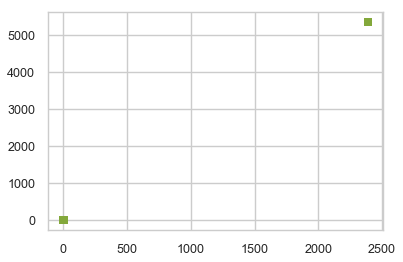

In [88]:
# computing K-Means with K = 5 (5 clusters)
centroids,_ = kmeans(data, 5)
# assign each sample to a cluster
idx,_ = vq(data, centroids)

# some plotting using numpy's logical indexing
plot(data[idx==0,0],data[idx==0,1],'ob',
     data[idx==1,0],data[idx==1,1],'oy',
     data[idx==2,0],data[idx==2,1],'or',
     data[idx==3,0],data[idx==3,1],'og',
     data[idx==4,0],data[idx==4,1],'om')
plot(centroids[:,0],centroids[:,1],'sg',markersize=8);

In [89]:
print(returns.idxmax())

Returns       BHF
Volatility    BHF
dtype: object


In [90]:
#plt.plot(stocks['BHF'])

In [91]:
#drop the relevant stock from our data
returns.drop('BHF',inplace=True)

#recreate data to feed into the algorithm
data = np.asarray([np.asarray(returns['Returns']),np.asarray(returns['Volatility'])]).T

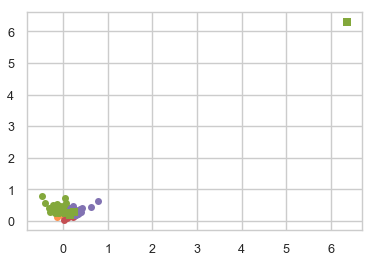

In [92]:
# computing K-Means with K = 5 (5 clusters)
centroids,_ = kmeans(data,5)
# assign each sample to a cluster
idx,_ = vq(data,centroids)

# some plotting using numpy's logical indexing
plot(data[idx==0,0],data[idx==0,1],'ob',
     data[idx==1,0],data[idx==1,1],'oy',
     data[idx==2,0],data[idx==2,1],'or',
     data[idx==3,0],data[idx==3,1],'og',
     data[idx==4,0],data[idx==4,1],'om')
plot(centroids[:,0],centroids[:,1],'sg',markersize=8);

In [93]:
print(returns.idxmax())

Returns       COL
Volatility    COL
dtype: object


In [94]:
#drop the relevant stock from our data
returns.drop('COL',inplace=True)

#recreate data to feed into the algorithm
data = np.asarray([np.asarray(returns['Returns']),np.asarray(returns['Volatility'])]).T

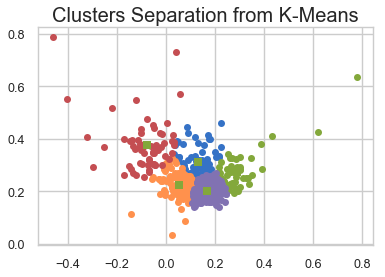

In [95]:
# computing K-Means with K = 5 (5 clusters)
centroids,_ = kmeans(data,5)
# assign each sample to a cluster
idx,_ = vq(data,centroids)

# some plotting using numpy's logical indexing
plot(data[idx==0,0],data[idx==0,1],'ob',
     data[idx==1,0],data[idx==1,1],'oy',
     data[idx==2,0],data[idx==2,1],'or',
     data[idx==3,0],data[idx==3,1],'og',
     data[idx==4,0],data[idx==4,1],'om')
plot(centroids[:,0],centroids[:,1],'sg',markersize=8)
plt.title('Clusters Separation from K-Means', fontsize=20);

In [102]:
details = [(name,cluster) for name, cluster in zip(returns.index,idx)]

l1=[]
l2=[]
l3=[]
l4=[]
l5=[]
for i in details:
    if i[1]==0:
        l1.append(i[0])
    elif i[1]==1:
        l2.append(i[0])
    elif i[1]==2:
        l3.append(i[0])
    elif i[1]==3:
        l4.append(i[0])
    else:
        l5.append(i[0])      
print(len(l1))
print(len(l2))
print(len(l3))
print(len(l4))
print(len(l5))
data1 = [l1, l2, l3, l4, l5]
len(data1)

71
127
62
49
166


5

In [103]:
dic = {'l1':l1, 'l2':l2, 'l3':l3, 'l4':l4, 'l5':l5}
new_df = pd.DataFrame(data=data1).transpose()
new_df = new_df.rename(columns={0:'Group1', 1:'Group2',2:'Group3',3:'Group4',4:'Group5'})
new_df.head()

,Group1,Group2,Group3,Group4,Group5
0,ABBV,MMM,AYI,ATVI,ABT
1,AKAM,AAP,AMG,ADBE,ACN
2,ALB,AET,ALXN,AMD,AES
3,AMP,ALK,AGN,ALGN,AFL
4,APTV,MO,ADS,GOOGL,A


In [104]:
def file_imp(number_articles): 
    df_list=[]

    for i in tcker[0:number_articles]:
        print(i)
        try:
            df = pd.read_csv(base_path+i+'_data.csv', index_col=0, 
                             usecols=['Date','Volume','Adj Close', 'Name'])
            df_list.append(df)
        except Exception as e:
            print(e)
        df_stocks = pd.concat(df_list)
    print(df_stocks.shape)
    return df_stocks

In [105]:
number_articles = 475
full_df = file_imp(number_articles)
full_df.head()

MMM
[Errno 2] File b'/Users/samypalaniappan/Desktop/03-Beat-the-Market/notebooks/data/5yr/MMM_data.csv' does not exist: b'/Users/samypalaniappan/Desktop/03-Beat-the-Market/notebooks/data/5yr/MMM_data.csv'


ValueError: No objects to concatenate

In [106]:
full_df = full_df.reset_index()
print(full_df.columns)
for i in range(len(full_df.Date)):
    full_df.loc[i,'Date'] = pd.to_datetime(full_df.loc[i,'Date']).date()
print(type(full_df.Date[5]))
full_df.head()

Index(['index', 'Date', 'Volume', 'Adj Close', 'Name', 'Cluster'], dtype='object')
<class 'datetime.date'>


,index,Date,Volume,Adj Close,Name,Cluster
0,0,2015-02-18,1552000.0,145.854767,MMM,4.0
1,1,2015-02-19,1648800.0,145.584686,MMM,4.0
2,2,2015-02-20,2416600.0,146.482147,MMM,4.0
3,3,2015-02-23,1836000.0,147.083328,MMM,4.0
4,4,2015-02-24,1770300.0,147.353409,MMM,4.0


In [107]:
for i in range(len(full_df)):
    if full_df.loc[i, 'Name'] in l1:
        full_df.loc[i, 'Cluster']=1
    elif full_df.loc[i, 'Name'] in l2:
        full_df.loc[i, 'Cluster']=2
    elif full_df.loc[i, 'Name'] in l3:
        full_df.loc[i, 'Cluster']=3
    elif full_df.loc[i, 'Name'] in l4:
        full_df.loc[i, 'Cluster']=4
    else:
        full_df.loc[i, 'Cluster']=5

In [122]:
cluster = full_df.groupby(['Cluster', 'Name', 'Date']).mean()
cluster = cluster.reset_index()
cluster = cluster.rename(columns={'Adj Close':'Price'})
cluster.head()
cluster.to_csv('5yr_cluster.csv')

## Return Calculations

In [247]:
def import_files(path_name, name):
    file = path_name+name
    df = pd.read_csv(file, delimiter=',')
    return df

In [255]:
cluster_5 = pd.read_csv('5yr_cluster.csv', index_col=None).drop(columns=['Unnamed: 0', 'index'])
print(cluster_5.shape)
cluster_5.head()

(582296, 5)


,Cluster,Name,Date,Volume,Price
0,1.0,ABBV,2015-02-18,10781700.0,48.247341
1,1.0,ABBV,2015-02-19,8665500.0,48.051876
2,1.0,ABBV,2015-02-20,15534000.0,49.925087
3,1.0,ABBV,2015-02-23,11582700.0,49.330544
4,1.0,ABBV,2015-02-24,7900700.0,49.574871


In [262]:
sp500 = import_files(base_path, '/raw_scraped/sp500.csv')
sp500 = sp500.rename(columns={'Adj Close':'Price'})
sp500['Name']='SP500'
sp500['Cluster']=6.0
sp500 = sp500.drop(columns=['Open', 'Close', 'High', 'Low'])
cols = ['Cluster', 'Name', 'Date', 'Volume', 'Price']
sp500 = sp500[cols]
sp500.tail()

,Cluster,Name,Date,Volume,Price
1291,6.0,SP500,2020-02-20,4007320000,3373.229980
1292,6.0,SP500,2020-02-21,3899270000,3337.750000
1293,6.0,SP500,2020-02-24,4842960000,3225.889893
1294,6.0,SP500,2020-02-25,5591510000,3128.209961
1295,6.0,SP500,2020-02-26,5478110000,3116.389893


In [264]:
cluster_6 = pd.concat([cluster_5, sp500])
cluster_6.shape

(583592, 5)

In [314]:
cluster_avg = pd.DataFrame(cluster.groupby(['Date']).agg('mean')).reset_index()
cluster_avg['Cluster']=7.0
cluster_avg['Name']='AVG'
cols = ['Cluster', 'Name', 'Date', 'Volume', 'Price']
cluster_avg = cluster_avg[cols]
print(cluster_avg.shape)
cluster_avg.head()

(1259, 5)


,Cluster,Name,Date,Volume,Price
0,7.0,AVG,2015-02-18,3.976038e+06,75.416226
1,7.0,AVG,2015-02-19,3.939573e+06,75.459715
2,7.0,AVG,2015-02-20,4.334727e+06,75.987635
3,7.0,AVG,2015-02-23,3.817157e+06,75.999380
4,7.0,AVG,2015-02-24,4.079385e+06,76.027519


In [439]:
cluster_mean = pd.concat([cluster_5, cluster_avg])
print(cluster_mean.shape)

cluster_7 = pd.concat([cluster_6, cluster_avg])
print(cluster_7.shape)
cluster_7.head()

(583555, 5)
(584851, 5)


,Cluster,Name,Date,Volume,Price
0,1.0,ABBV,2015-02-18,10781700.0,48.247341
1,1.0,ABBV,2015-02-19,8665500.0,48.051876
2,1.0,ABBV,2015-02-20,15534000.0,49.925087
3,1.0,ABBV,2015-02-23,11582700.0,49.330544
4,1.0,ABBV,2015-02-24,7900700.0,49.574871


In [316]:
data = pd.DataFrame(cluster_mean.groupby(['Cluster', 'Date']).agg('mean'))
unstacked_price = data.unstack(level=0).drop(columns=['Volume'])
unstacked_volume = data.unstack(level=0).drop(columns=['Price'])

In [349]:
data = pd.DataFrame(cluster_mean.groupby(['Cluster', 'Date']).agg('mean'))
unstacked_price = data.unstack(level=0).drop(columns=['Volume'])
unstacked_volume = data.unstack(level=0).drop(columns=['Price'])
unstacked_price 

Price                                                \
Cluster            1.0        2.0        3.0         4.0         5.0   
Date                                                                   
2015-02-18   80.257353  69.461573  68.491555   99.104401   73.360450   
2015-02-19   80.767464  69.221574  68.668297   99.640587   73.224993   
2015-02-20   81.187979  69.769891  69.006328  100.359652   73.795677   
2015-02-23   81.021268  69.896537  68.789705  100.170027   73.937603   
2015-02-24   80.930603  69.895431  68.646889  100.433054   74.030091   
...                ...        ...        ...         ...         ...   
2020-02-11  109.653837  78.288330  34.729530  336.601837  152.804751   
2020-02-12  110.957509  78.692018  34.602968  340.083438  153.374817   
2020-02-13  110.679128  78.480041  34.748013  340.711668  153.589526   
2020-02-14  110.790572  78.417603  34.508305  341.963336  154.010031   
2020-02-18  110.484857  78.054381  34.235617  341.596144  153.600551   

                        
Cluster            7.0  
Date                    
2015-02-18   75.416226  
2015-02-19   75.459715  
2015-02-20   75.987635  
2015-02-23   75.999380  
2015-02-24   76.027519  
...                ...  
2020-02-11  130.767459  
2020-02-12  131.409099  
2020-02-13  131.680951  
2020-02-14  131.930184  
2020-02-18  131.570404  

[1259 rows x 6 columns]

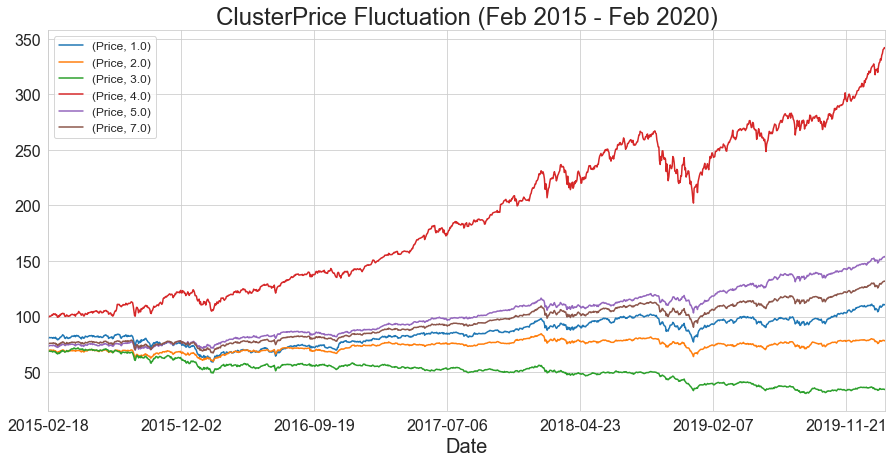

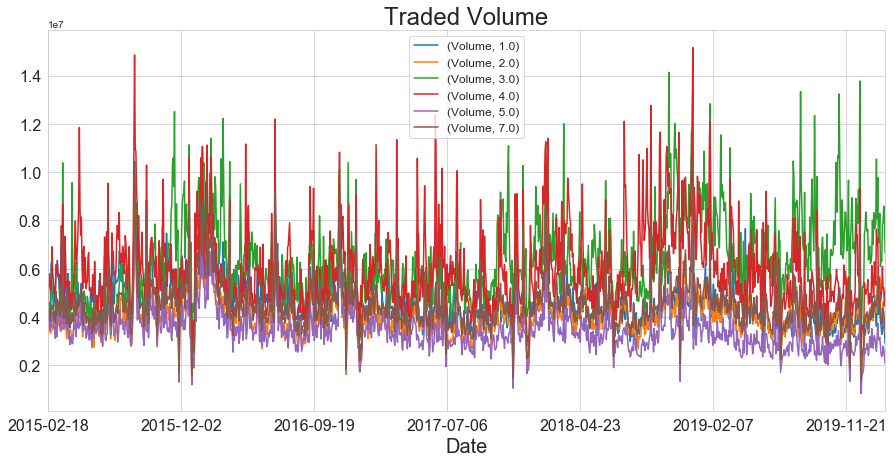

In [438]:
unstacked_price.plot(legend=True, figsize=(15, 7))
plt.title('ClusterPrice Fluctuation (Feb 2015 - Feb 2020)', fontsize=24)
plt.xlabel('Date', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=12)

unstacked_volume.plot(legend=True, figsize=(15, 7))
plt.title('Traded Volume', fontsize=24)
plt.xlabel('Date', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=12)

In [291]:
mask = (cluster_7.Name=='SP500') & (cluster_7.Date=='2015-02-18')
cluster_7[mask]

,Cluster,Name,Date,Volume,Price
31,6.0,SP500,2015-02-18,3.370020e+09,2099.679932


In [321]:
mask = cluster_7.Date == '2020-02-18'
cluster_max = cluster_7[mask]
cluster_max = cluster_max.rename(columns={'Volume':'Final_Vol','Price':'Final_Price'})
print(cluster_max.shape)
mask = cluster_7.Date == '2015-02-18'
cluster_min = cluster_7[mask]
cluster_min = cluster_min.rename(columns={'Volume':'Init_Vol','Price':'Init_Price'})
print(cluster_min.shape)
minmax = pd.merge(left=cluster_min, right=cluster_max, on='Name')
minmax.head()

(464, 5)
(459, 5)


,Cluster_x,Name,Date_x,Init_Vol,Init_Price,Cluster_y,Date_y,Final_Vol,Final_Price
0,1.0,ABBV,2015-02-18,10781700.0,48.247341,1.0,2020-02-18,5454580.0,93.599998
1,1.0,AKAM,2015-02-18,1630100.0,70.290001,1.0,2020-02-18,1445381.0,100.959999
2,1.0,ALB,2015-02-18,1070400.0,50.418453,1.0,2020-02-18,1246538.0,88.720001
3,1.0,AMP,2015-02-18,945900.0,119.202225,1.0,2020-02-18,698183.0,177.315002
4,1.0,APTV,2015-02-18,1737000.0,61.232708,1.0,2020-02-18,672851.0,88.019997


In [340]:
gb = minmax.groupby('Cluster_x')
cluster_earnings = gb.agg({'Name':'count', 'Init_Price':'sum', 'Final_Price':'sum'})
cluster_earnings['Return'] = (cluster_earnings.Final_Price - cluster_earnings.Init_Price)\
/cluster_earnings.Init_Price*100
cluster_earnings = cluster_earnings.reset_index().rename(columns={'Cluster_x':'Cluster'})
# cluster_earnings['Cluster'] = [str(x) for x in cluster_earnings.index]
cluster_earnings['Cluster']=['1', '2', '3','4','5','S&P500','AVG']
# cluster_earnings.loc[6, 'Cluster']='AVG'
cluster_earnings.loc[6, 'Name']=456
cluster_earnings.head(7)

,Cluster,Name,Init_Price,Final_Price,Return
0,1,69,5537.757347,7719.570000,39.398849
1,2,118,8182.347186,9328.650045,14.009462
2,3,57,3862.270681,1977.576412,-48.797571
3,4,47,4657.906843,16274.344917,249.391808
4,5,163,11988.521442,25112.870325,109.474291
5,S&P500,1,2099.679932,3370.290039,60.514466
6,AVG,456,75.416226,131.570404,74.459014


In [472]:
# from bokeh.charts import Bar, output_notebook, show, vplot
from bokeh.palettes import Blues5
from bokeh.models import Legend
from bokeh.plotting import figure

x = cluster_earnings.Cluster
y = cluster_earnings.Return
z = cluster_earnings.Name

plot = figure(x_range=x, y_range=(-100, 250), plot_width=400, plot_height=400, 
           x_axis_label='Cluster', y_axis_label='Average Returns (%)')


plot.xaxis.major_label_orientation = np.pi/4  
plot.xaxis.axis_label_text_font_size = "16pt"
plot.xaxis.major_label_text_font_size = "16pt"
plot.xaxis.axis_label_text_font = "times"
plot.xaxis.axis_label_text_color = "black"


plot.yaxis.axis_label_text_font_size = "16pt"
plot.yaxis.major_label_text_font_size = "16pt"
plot.yaxis.axis_label_text_font = "times"
plot.yaxis.axis_label_text_color = "black"
plot.vbar(x=x, width=0.5, bottom=0,
       top=y, color="blue")
show(plot)

In [339]:
x = cluster_earnings.Cluster
y = cluster_earnings.Return
z = cluster_earnings.Name

plot = figure(x_range=x, y_range=(0, 500), plot_width=400, plot_height=400, 
           x_axis_label='Cluster', y_axis_label='No. of stocks in the cluster')

plot.xaxis.major_label_orientation = np.pi/4  
plot.xaxis.axis_label_text_font_size = "16pt"
plot.xaxis.major_label_text_font_size = "16pt"
plot.xaxis.axis_label_text_font = "times"
plot.xaxis.axis_label_text_color = "black"


plot.yaxis.axis_label_text_font_size = "16pt"
plot.yaxis.major_label_text_font_size = "16pt"
plot.yaxis.axis_label_text_font = "times"
plot.yaxis.axis_label_text_color = "black"
plot.vbar(x=x, width=0.5, bottom=0,
       top=z, color="orange")

show(plot)

In [479]:
mask = cluster_5.Cluster == 4.0
cluster4 = cluster_5[mask]
cluster4 =cluster4.groupby('Name').agg('mean').reset_index()
dct =[]
for i in range(len(cluster4)):
    x = {'Name':cluster4.Name[i], 'Price':int(cluster4.Price[i])}
    dct.append(x)
    
df = pd.DataFrame(dct)
df.to_csv('5yr_result.csv')
for i in range(len(df)):
    print(f'{df.Name[i]}; {df.Price[i]}')

AAPL; 154
ADBE; 174
ADSK; 105
ALGN; 174
AMAT; 36
AMD; 14
AMZN; 1155
ANSS; 138
ATVI; 48
AVGO; 201
BA; 233
BBY; 51
CDNS; 38
CHTR; 300
CRM; 107
CSX; 48
CTAS; 148
DHI; 36
DHR; 87
EQIX; 380
EW; 128
FB; 146
GOOG; 937
GOOGL; 950
GPN; 99
HUM; 236
IDXX; 160
INTU; 160
ISRG; 350
KLAC; 91
LRCX; 141
MA; 156
MCHP; 70
MCO; 138
MSFT; 81
NFLX; 208
NVDA; 131
PGR; 46
PYPL; 67
RMD; 84
SNPS; 80
SPGI; 156
TDG; 275
TXN; 81
UNH; 185
V; 110
VRSN; 118
XLNX; 66
